In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [5]:
import numpy as np
import pandas as pd
colnames = ['SepLenInCM','SepWidInCM','PetalLenInCM','PetalWidthInCM','Class']
iris = pd.read_csv("iris.data",names = colnames)
iris.head(10)

irisRandom = pd.get_dummies(iris, drop_first=True)
irisRandom.sample(10, random_state = 5)

,SepLenInCM,SepWidInCM,PetalLenInCM,PetalWidthInCM,Class_Iris-versicolor,Class_Iris-virginica
82,5.8,2.7,3.9,1.2,1,0
134,6.1,2.6,5.6,1.4,0,1
114,5.8,2.8,5.1,2.4,0,1
42,4.4,3.2,1.3,0.2,0,0
109,7.2,3.6,6.1,2.5,0,1
57,4.9,2.4,3.3,1.0,1,0
1,4.9,3.0,1.4,0.2,0,0
70,5.9,3.2,4.8,1.8,1,0
25,5.0,3.0,1.6,0.2,0,0
84,5.4,3.0,4.5,1.5,1,0


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [6]:
medianSepLenInCM = iris.loc[:,"SepLenInCM"].median()
print (medianSepLenInCM)
medianSepWidInCM = iris.loc[:,"SepWidInCM"].median()
print (medianSepWidInCM)
medianPetalLenInCM = iris.loc[:,"PetalLenInCM"].median()
print (medianPetalLenInCM)
medianPetalWidthInCM = iris.loc[:,"PetalWidthInCM"].median()
print (medianPetalWidthInCM)
iris=iris.replace({'SepLenInCM': {0: medianSepLenInCM}})
iris=iris.replace({'SepWidInCM': {0: medianSepWidInCM}})
iris=iris.replace({'PetalLenInCM': {0: medianPetalLenInCM}})
iris=iris.replace({'PetalWidthInCM': {0: medianPetalWidthInCM}})
iris.head(10)

5.8
3.0
4.35
1.3


,SepLenInCM,SepWidInCM,PetalLenInCM,PetalWidthInCM,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [7]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
iris["Class"] = lb_make.fit_transform(iris["Class"])
iris.sample(10, random_state = 5)

,SepLenInCM,SepWidInCM,PetalLenInCM,PetalWidthInCM,Class
82,5.8,2.7,3.9,1.2,1
134,6.1,2.6,5.6,1.4,2
114,5.8,2.8,5.1,2.4,2
42,4.4,3.2,1.3,0.2,0
109,7.2,3.6,6.1,2.5,2
57,4.9,2.4,3.3,1.0,1
1,4.9,3.0,1.4,0.2,0
70,5.9,3.2,4.8,1.8,1
25,5.0,3.0,1.6,0.2,0
84,5.4,3.0,4.5,1.5,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [8]:
iris.drop(iris.columns[[-1,]],axis=1, inplace=False)
iris.corr()

,SepLenInCM,SepWidInCM,PetalLenInCM,PetalWidthInCM,Class
SepLenInCM,1.000000,-0.109369,0.871754,0.817954,0.782561
SepWidInCM,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLenInCM,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthInCM,0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


# No value between -0.1 and 1

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [10]:
iris.var()

SepLenInCM        0.685694
SepWidInCM        0.188004
PetalLenInCM      3.113179
PetalWidthInCM    0.582414
Class             0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

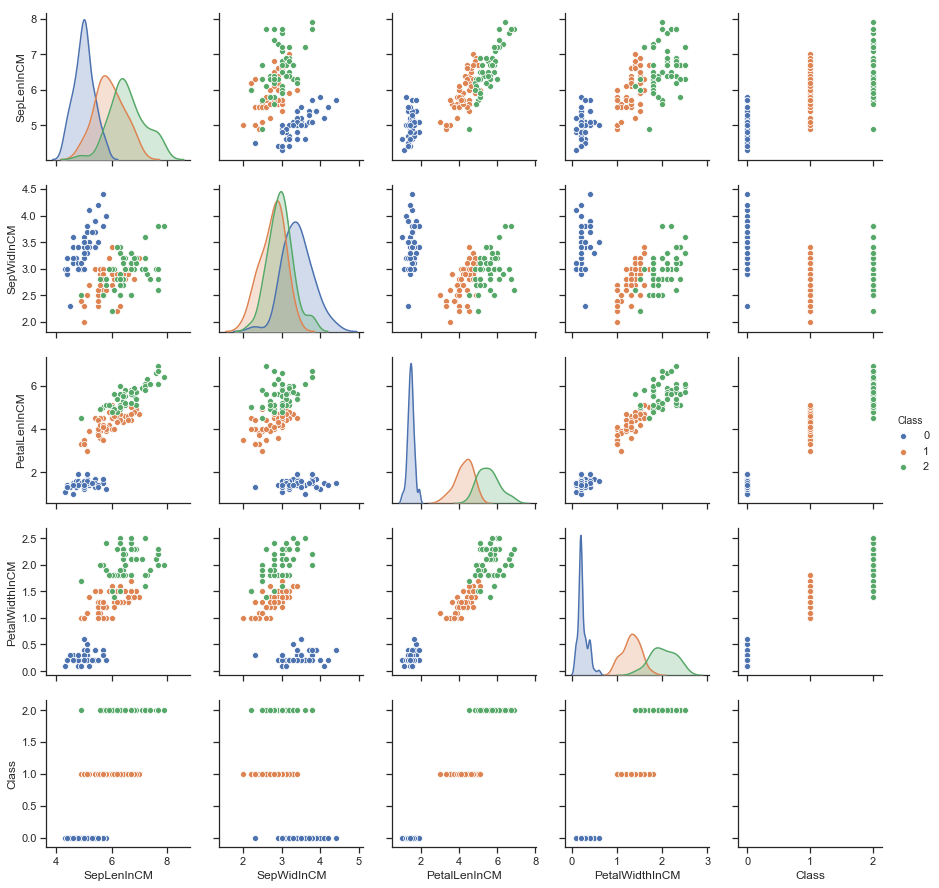

In [12]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
%matplotlib inline 

X = iris.drop("Class", axis=1)
y = iris["Class"]
sns.set(style="ticks")
sns.pairplot(iris, hue="Class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import VarianceThreshold

test_size = 0.20 
seed = 5 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [14]:
def KNNModel(k):
    NNH = KNeighborsClassifier(n_neighbors= k)
    NNH.fit(X_train, y_train)
    trainPreds=NNH.predict(X_train)
    testPreds=NNH.predict(X_test)
    trainAccuracy=accuracy_score(y_train,trainPreds)
    testAccuracy=accuracy_score(y_test,testPreds)
    resultsDf = pd.DataFrame( index=["KValue", "Accuracy"])
    trainResults=[k, trainAccuracy]
    testResults=[k, testAccuracy]
    resultsDf['Train set results'] = trainResults
    resultsDf['Test set results'] = testResults
    
    return resultsDf.round(2)

In [15]:
KList=[3,5,9]

for k in KList:
    resultDf=KNNModel(k)
    print("Accuracy when K-Value is {0} :".format(k))
    print(resultDf)
    print()

Accuracy when K-Value is 3 :
          Train set results  Test set results
KValue                 3.00              3.00
Accuracy               0.98              0.93

Accuracy when K-Value is 5 :
          Train set results  Test set results
KValue                 5.00              5.00
Accuracy               0.98              0.93

Accuracy when K-Value is 9 :
          Train set results  Test set results
KValue                 9.00              9.00
Accuracy               0.98              0.97



## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [32]:
neighbors = list(range(1,20,2))
cross_validation_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

MSE = [1 - x for x in cross_validation]
optimal_k = neighbors[MSE.index(min(MSE))]

print("Lowest Error is : ",min(MSE))
print("Optimal neghbours is : ",optimal_k)

#Optimal value got from previous step
resultDf=KNNModel(13)
print("Model Accuracy When K-Value is {0}  (Optimal Value)".format(optimal_k))
print(resultDf)

Lowest Error is :  0.01666666666666683
Optimal neghbours is :  5
Model Accuracy When K-Value is 5  (Optimal Value)
          Train set results  Test set results
KValue                13.00             13.00
Accuracy               0.98              0.97


## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

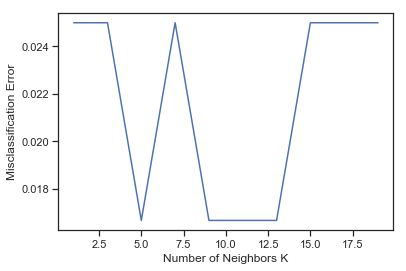

In [20]:
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Naive Bayes with Iris Data

In [21]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [22]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int64
     SepLenInCM  SepWidInCM  PetalLenInCM  PetalWidthInCM
0           5.1         3.5           1.4             0.2
1           4.9         3.0           1.4             0.2
2           4.7         3.2           1.3             0.2
3           4.6         3.1           1.5             0.2
4           5.0         3.6           1.4             0.2
5           5.4         3.9           1.7             0.4
6     

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a260e85f8>]],
      dtype=object)

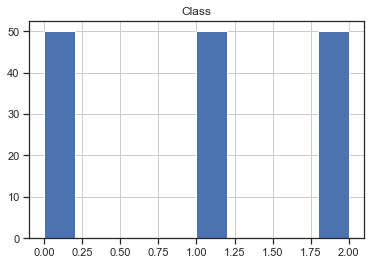

In [23]:
iris.hist(column='Class')

In [ ]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

[]

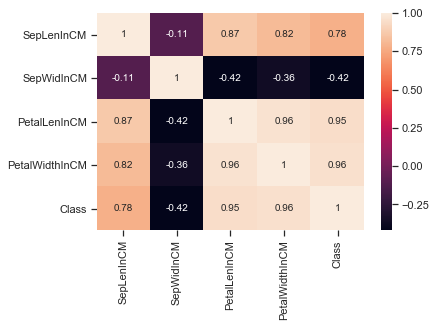

In [24]:
sns.heatmap(iris.corr(),annot=True)
plt.plot()

1. PetalWidthInCM and Class are slightly correlated (0.96) with each other
2. PetalLenInCM and PetalWidthInCM are slightly correlated (0.96) with each other
3. PetalLenInCM and Class are slightly correlated (0.95) with each other


### Split data in Training and test set in 80:20.

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X
test_size = 0.20 
seed = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

### Question 14 
Train and Fit NaiveBayes Model

In [27]:
#Fit the model
model = GaussianNB()
model.fit(X_train, y_train)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [28]:
#Predict
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [29]:
# show Confusion Matrix
metrics.confusion_matrix(predicted, y_test)

array([[ 8,  0,  0],
       [ 0, 10,  2],
       [ 0,  1,  9]])

In [30]:
# show accuracy
print("Accuracy ",accuracy_score(y_test,predicted))

Accuracy  0.9


In [31]:
#Show precision and Recall metricsabs
cr=metrics.classification_report(y_test,predicted)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

   micro avg       0.90      0.90      0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



# For Practice  - Optional

All the questions from 16 to 20 are for practice.

# Using SVM with Diebetes Dataset

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Question 16 
Read the input file 'Diabetes.csv' using Pandas and check it's column names.

Check dimension of dataset.

Check distribution of dependent variable, Outcome and plot it.


In [ ]:
# Eye ball the imported dataset

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

# Question 17 
Check data distribution using summary statistics and provide your findings.

Do correlation analysis and bivariate viualization with Insights


# Question 18 
Do train and test split. 
Optionally - You can do with stratify sampling(optional) on Outcome variable to maintain the distribution of dependent variable

# Question 19 
Train Support Vector Machine Model(1 Marks)

In [ ]:
# use from sklearn.svm import SVC

In [ ]:
# your insights

# Question 20
Scale the data points using MinMaxScaler

Fit SVM Model on Scale data and give your observation

#we can try increasing either C or gamma to fit a more complex model.

# Optional Question - 
Try improving the model accuracy using C=1000 (1 Marks)

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [ ]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [ ]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [ ]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [ ]:
gs.fit(X_train_scaled, y_train) 

In [ ]:
gs.best_estimator_

In [ ]:
gs.best_score_ 